Clasificador de Spam
En este proyecto haremos dos clasificadores, uno será el clasificador de naive bayes y otro será support vector machine.

Los dos clasificadores se encargaran de decidir si un correo es spam o no.
Este problema es muy interesante pues tiene una aplicación muy práctica en la vida cotidiana

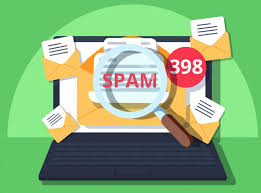

Las librerías que usaremos serán:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

Ya teniendo las librerías necesarias lo primero que haremos será la extracción de datos de un archivo.csv

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head(n=10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Esto es un pequeño muestreo de como estan los datos en nuestro dataset (10 primeros datos)

Primero que todo deplegaremos los datos para observar cuantas clases tenemos en estos datos, pues es un dato interesante para el naive bayes.

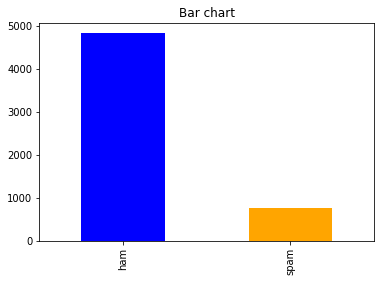

In [3]:
count_Class=pd.value_counts(data["v1"])
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

Se puede observar claramente como tenemos muy pocos correos spam en el dataset.

Aquí empezaremos el preprocesamiento primero buscaremos cuales son las palabras mas comunes en estas diferentes clases.

In [4]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
Palabras_ham = pd.DataFrame.from_dict(count1)
Palabras_ham = Palabras_ham.rename(columns={0: "words in non-spam", 1 : "count"})

count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
Palabras_spam = pd.DataFrame.from_dict(count2)
Palabras_spam = Palabras_spam.rename(columns={0: "words in spam", 1 : "count_"})

Aquí ya obtenemos las 20 palabras mas comunes en estos datos y enseguida la desplegaremos, primero las palabras que mas se repiten y no son spam.

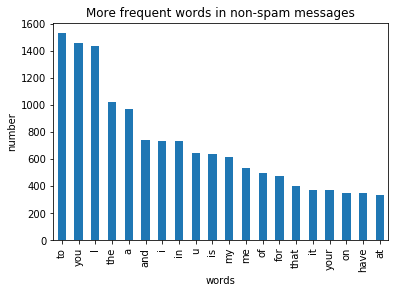

In [5]:
Palabras_ham.plot.bar(legend = False)
y_pos = np.arange(len(Palabras_ham["words in non-spam"]))
plt.xticks(y_pos, Palabras_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Enseguida las palabras mas frecuentes que vienen en un correo spam

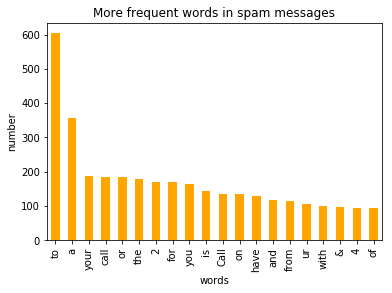

In [6]:
Palabras_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(Palabras_spam["words in spam"]))
plt.xticks(y_pos, Palabras_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Enseguida lo que haremos será eliminar todas las palabras "Stop words"(The,and,a,etc.) que tenemos en nuestro texto

In [35]:
data["v2"][0] = " "
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

  (0, 6000)	1
  (0, 2088)	1
  (0, 3853)	1
  (0, 4855)	1
  (0, 4505)	1
  (0, 8008)	2
  (0, 2022)	2
  (0, 2277)	1
  (0, 7829)	1
  (0, 8291)	2
  (0, 7699)	1


Ahora empezaremos haciendo el x_train, y_train, x_test y y_train de manera que los test sean el 33% de los datos. 

In [33]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8402), (1839, 8402)]
  (0, 6289)	1
  (0, 4587)	1
  (0, 4455)	1
  (0, 4318)	1
  (0, 4395)	1
  (0, 977)	1
  (0, 5342)	1
  (0, 2252)	1
  (0, 1594)	1
  (0, 2708)	1
  (0, 1810)	1


Enseguida haremos 182 modelos modificando el "alpha" o smooth de estos modelos, al final haremos match entre todos estos modelos y eligiremos el mejor

In [9]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

Ya hechos los modelos, el proximo paso será ver las calificaciones de estos para elegir el mejor.

In [10]:
matrix = np.matrix(np.c_[list_alpha, score_test, recall_test, precision_test])
models_nb = pd.DataFrame(data = matrix, columns =['alpha', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models_nb.head(n=10)

,alpha,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.974443,0.920635,0.895753
1,0.11001,0.976074,0.936508,0.893939
2,0.22001,0.977705,0.936508,0.904215
3,0.33001,0.977162,0.936508,0.900763
4,0.44001,0.977162,0.936508,0.900763
5,0.55001,0.976618,0.936508,0.897338
6,0.66001,0.976074,0.932540,0.896947
7,0.77001,0.976074,0.924603,0.903101
8,0.88001,0.976074,0.924603,0.903101
9,0.99001,0.976074,0.920635,0.906250


Analisis para elegir

La meta de este clasificador es predecir si un email es spam o no, pero aparte del accuracy tendremos una medida muy importante presente, la precision.

Por ejemplo tenemos 2 escenarios de un predict malo:

1.- Falso Positivo

    Que no era Spam y lo califico en spam
    
2.- Positivo Falso

    Que si era Spam y lo califico como no spam

En todo caso se prefiere la primera opcion, así que en este caso será mas importante la presicion que el recall.

In [11]:
best_index = models_nb['Test Precision'].idxmax()
models_nb.iloc[best_index]

alpha             15.730010
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

En este caso tenemos una precision genial!
Sin embargo no es el único ahora la siguiente medida para elegir el mejor será el accuracy

In [12]:
models_nb[models_nb['Test Precision']==1].head(n=5)

,alpha,Test Accuracy,Test Recall,Test Precision
143,15.73001,0.969549,0.777778,1.0
144,15.84001,0.969549,0.777778,1.0
145,15.95001,0.969549,0.777778,1.0
146,16.06001,0.969549,0.777778,1.0
147,16.17001,0.969549,0.777778,1.0


Buscaremos el Test Accuracy mas alto entre los anteriormente elegidos

In [13]:
best_index = models_nb[models_nb['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models_nb.iloc[best_index, :]

alpha             15.730010
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

Aquí tenemos al mejor modelo de naive bayes

In [14]:
m_confusion_test_nb = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test_nb, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


Suport vector machine
Ahora que tenemos a los datos ya preprocesados, nomas nos queda realizar el fit y el test con SVMs.
Lo que haremos será al igual que en naive bayes, obtener muchos clasificadores de SVMs variando el ancho de la calle.

In [15]:
list_C = np.arange(500, 2000, 100) #100000
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

Obteniendo ya los modelos ahora veremos cuales son los mejores modelos.

In [16]:
matrix = np.matrix(np.c_[list_C, score_test, recall_test, precision_test])
models_SVMs = pd.DataFrame(data = matrix, columns = 
             ['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models_SVMs.head(n=10)

,C,Test Accuracy,Test Recall,Test Precision
0,500.0,0.982599,0.873016,1.0
1,600.0,0.982599,0.873016,1.0
2,700.0,0.982599,0.873016,1.0
3,800.0,0.983143,0.876984,1.0
4,900.0,0.983143,0.876984,1.0
5,1000.0,0.983143,0.876984,1.0
6,1100.0,0.983143,0.876984,1.0
7,1200.0,0.983143,0.876984,1.0
8,1300.0,0.983143,0.876984,1.0
9,1400.0,0.983143,0.876984,1.0


In [17]:
best_index = models_SVMs['Test Precision'].idxmax()
models_SVMs[models_SVMs['Test Precision']==1].head(n=5)

,C,Test Accuracy,Test Recall,Test Precision
0,500.0,0.982599,0.873016,1.0
1,600.0,0.982599,0.873016,1.0
2,700.0,0.982599,0.873016,1.0
3,800.0,0.983143,0.876984,1.0
4,900.0,0.983143,0.876984,1.0


Al igual elegiremos los que tienen mayor precision, y como tenemos varios con la presicion en 1 nuestro siguiente valor para elegir sera el Accuracy

In [18]:
best_index = models_SVMs[models_SVMs['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models_SVMs.iloc[best_index, :]

C                 800.000000
Test Accuracy       0.983143
Test Recall         0.876984
Test Precision      1.000000
Name: 3, dtype: float64

Con este tenemos el mejor accuracy y vemos que el mejor anchor de la calle fue de 800.
A continuación veremos su matriz de confusion:

In [19]:
m_confusion_test_svm = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test_svm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,31,221


Casi para terminar checaremos las caracteristicas del modelo de naive bayes contra el de SVMs para decidir cual modelo es mejor

In [20]:
print("Modelo de Naive Bayes")
print("")
print(pd.DataFrame(data = m_confusion_test_nb, columns = ['Predicted no spam', 'Predicted spam'],
            index = ['Actual no spam', 'Actual spam']))
print("")
print(models_nb.iloc[best_index, :])

print("")
print("Modelo de SVMs")
print("")
print(pd.DataFrame(data = m_confusion_test_svm, columns = ['Predicted no spam', 'Predicted spam'],
            index = ['Actual no spam', 'Actual spam']))
print("")
print(models_SVMs.iloc[best_index, :])

Modelo de Naive Bayes

                Predicted no spam  Predicted spam
Actual no spam               1587               0
Actual spam                    56             196

alpha             0.330010
Test Accuracy     0.977162
Test Recall       0.936508
Test Precision    0.900763
Name: 3, dtype: float64

Modelo de SVMs

                Predicted no spam  Predicted spam
Actual no spam               1587               0
Actual spam                    31             221

C                 800.000000
Test Accuracy       0.983143
Test Recall         0.876984
Test Precision      1.000000
Name: 3, dtype: float64


Para terminar escribiremos un email y veremos la eficacia de los modelos

In [21]:
data["v2"][0] = "Get the official ENGLAND poly ringtone or colour flag on yer mobile for tonights game! Text TONE or FLAG to 84199. Optout txt ENG STOP Box39822 W111WX å£1.50"
f = feature_extraction.text.CountVectorizer(stop_words = 'english',max_features = 8402)
X = f.fit_transform(data["v2"])
print(X.shape)

(5572, 8402)


La parte anterior fue el preprocesamiento de los datos, ya con los datos procesados se los daremos  a los modelos para compararlos.

In [22]:
print("Predict del support vector machine")
if(svc.predict(X[0]) == 0):
    print("No es spam")
else:
    print("Si es spam")

print("\nPredict de naive bayes")
if(bayes.predict(X[0]) == 0):
    print("No es spam")
else:
    print("Si es spam")

Predict del support vector machine
Si es spam

Predict de naive bayes
Si es spam


Este ha sido to el proyecto para clasificar correos spam.